In [1]:
from ROOT import TCanvas
from ROOT import TH1F
from ROOT import gStyle
from array import array
import math
import random

c1 = TCanvas( 'c1', 'Simple Integration Example', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

Welcome to JupyROOT 6.18/00


In [2]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

In [3]:
gStyle.SetOptFit(1)
h1 = TH1F("h1","h1",100,0.98,1.02)

In [4]:
random.seed(1)

In [5]:
niter = 100
npoints = 100000
xlow = 0.0
xhigh = 1.0
dx = (xhigh-xlow)/npoints

error = 0.0
for j in range(0,niter):
    sum_iter = 0.0
    sigma_iter = 0.0

    for i in range(0,npoints):
        xval = xlow+random.random()*(xhigh-xlow)
        yval = generator_function(xval)
        sum_iter = sum_iter + dx*yval
        sigma_iter = sigma_iter + dx*yval*yval
        
    error = error + math.pow(math.sqrt(sigma_iter - sum_iter*sum_iter)/math.sqrt(npoints),2)
    h1.Fill(sum_iter)

print("Error Upper Bound = %f" % (math.sqrt(error)/niter))

Error Upper Bound = 0.000141


 FCN=15.0726 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=1.21911e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.30587e+01   2.14915e+00   2.77711e-03   2.42803e-04
   2  Mean         9.99945e-01   1.26995e-04   4.76811e-07  -4.36415e+00
   3  Sigma        1.04275e-03   1.34738e-04   4.82992e-05   4.08443e-02


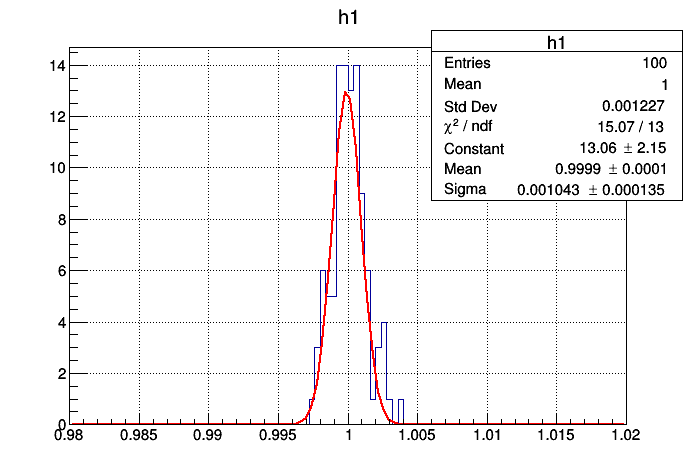

In [6]:
h1.Draw()
h1.Fit("gaus")
c1.Draw()